## Intro

Once the text data is cleaned and tokenized it is ready for NLP analysis. Vectorization of the tokens allows data scientist to mathematically represent text as vectors. There are numerous ways to create these vectors.


+ compare between ML models with different feature representation (count vector, weigthed and unweighted embedding models)

+ single model (e.g., logistic regression with count vector representation), and compare the performance with different amount of info. 

+ Unweighted, you just sum the word embeddings of an job ad as the representation of an job ad. 

+ Weighted sum, ou can do a weighted sum of word embeddings as representation instead of just sum. 

You can do that for any embedding models and generate two version of doc representation

## bulid:

+ count vector representation
+ weigthed embedding representation (use TF-IDF as the weight when you do weighted sum of word embeddings)
+ unweigted embedding representation. 

## Question 
+ load pretrained model or train it from stractch

In [ ]:
from itertools import chain
from nltk.probability import *
from itertools import chain
# import code as a function
from src.utils import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing libraries

In [1]:
# def stats_print(tk_description):
#     words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
#     vocab = set(words) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
#     lexical_diversity = len(vocab)/len(words)
#     print("Vocabulary size: ",len(vocab))
#     print("Total number of tokens: ", len(words))
#     print("Lexical diversity: ", lexical_diversity)
#     print("Total number of description:", len(tk_description))
#     lens = [len(article) for article in tk_description]
#     print("Average description length:", np.mean(lens))
#     print("Maximum description length:", np.max(lens))
#     print("Minimum description length:", np.min(lens))
#     print("Standard deviation of description length:", np.std(lens))

# Code to import libraries as you need in this assessment, e.g.,
# Read job_ad.csv
job_ad = pd.read_csv('job_ad.csv')

# # get the description of the job ad
# description = job_ad['Description']
# # get the tokenized description of the job ad
# tk_description = job_ad['Tokenized Description']
webindex = job_ad['Webindex']


# print first 3 rows
job_ad.head(3)

,Title,Webindex,Company,Description,Tokenized Description,Category
0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South ...,"['accountant', 'partqualified', 'south', 'east...",Accounting_Finance
1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is cu...,"['leading', 'hedge', 'funds', 'london', 'recru...",Accounting_Finance
2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an ...,"['exciting', 'opportunity', 'arisen', 'join', ...",Healthcare_Nursing


In [2]:
descriptionFile = './description.txt'
with open(descriptionFile) as f:
    tk_description = f.read().splitlines() # read all the descriptions into a list
    
print(len(tk_description))
type(tk_description)

776


list

#### Converting each description text string into list of tokens

In [3]:
tk_description = [description.split(" ") for description in tk_description] # note that we have to revert the join string into

# Explore the current statistics
stats_print(tk_description)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of description: 776
Average description length: 132.69974226804123
Maximum description length: 471
Minimum description length: 12
Standard deviation of description length: 70.3782402519735


#### Reading the corresponding category labels

In [4]:
# read the category of the job ad
categoryFile = './category.txt'
with open(categoryFile) as f:
    category = f.read().splitlines() # read all the category into a list
    
print(len(category))
type(category)

776


list

#### Making sure we done it right
Take an example, e.g., the 10th element

In [5]:
print(f'The number of the category: {len(category)}')
print(f'The number of the description: {len(tk_description)}')
if len(category) == len(tk_description):
    print(f'The number of category of category and description are the same and corresponding to each other')

The number of the category: 776
The number of the description: 776
The number of category of category and description are the same and corresponding to each other


In [43]:
test_index = 20

### ----------------> OBSERVATION

We can see the length of the description text and corresponding labels are equal.

Convert the loaded category labels to integers:

## Constructing the Vocabulary

Now, we complete all the basic pre-process step and we are ready to move to feature generation! &#129321;
Before we start, in this task, you are required to construct the final vocabulary, e.g., `vocab`:

In [8]:
# generating the vocabulary

words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
vocab = sorted(list(set(words))) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words

len(vocab)

5218

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Generating Feature Representations</strong></h3>

So let's say we do binary feature representation but with 3 types of data, the title, the description, and title+description.

In [9]:
from collections import Counter

"""
Bag-of-words model:
Generate the Count vector representation for each job advertisement description, and save
them into a file (please refer to the required output). Note, the generated Count vector
representation must be based on the generated vocabulary in Task 1 (as saved in vocab.txt).
"""
# bag of words model
def bag_of_words(description, vocab):
    # create a list of 0s with the same length as the vocab
    bow = [0] * len(vocab)
    # count the number of times each word appears in the description
    word_counts = Counter(description)
    # update the bow list with the word counts
    for word, count in word_counts.items():
        bow[vocab.index(word)] = count
    return bow

# Generate the Count vector representation for each job advertisement description
bow = [bag_of_words(description, vocab) for description in tk_description]

## 2.1 Saving outputs
Save the count vector representation as per spectification.
- `count_vectors.txt`

`count_vectors.txt` stores the sparse count vector representation of job advertisement descriptions in the following format. Each line of this file corresponds to one advertisement. It starts with a ‘#’ key followed by the webindex of the job advertisement, and a comma ‘,’. The rest of the line is the sparse representation of the corresponding description in the form of word_integer_index:word_freq separated by comma. Following is an example of the file format.

In [10]:

# save count vector representation of job advertisement descriptions
with open('count_vectors.txt', 'w') as f:
    for i, description in enumerate(tk_description):
        f.write('#' + str(webindex[i]) + ',')
        for word in description:
            f.write(str(vocab.index(word)) + ':' + str(bow[i][vocab.index(word)]) + ',')
        f.write('\n')
    print("Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file")


Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Generating Feature Representations</strong></h3>

So let's say we do binary feature representation but with 3 types of data, the title, the description, and title+description.

## Task 5. Generating Feature Vectors

In this task, we are going to generate feature vectors from tokenized review text. We are going to explore different feature vectors, including binary, count, and tf-idf vectors.

### Task 5.1 Generating Binary Vectors
In this subtask, let's start with generating the binary vector representation for each review.

We need to first import the `CountVectorizer` and initialise it.

In [11]:
# binding the words together for each review
joined_description = [' '.join(review) for review in tk_description]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
bVectorizer = CountVectorizer(analyzer = "word",binary = True,vocabulary = vocab) # initialise the CountVectorizer

In [13]:
binary_features = bVectorizer.fit_transform(joined_description)
binary_features.shape

(776, 5218)

### Task 5.2 Generating Count Vectors

In this subtasks, you are required to generate the count vector features of review texts.

In [14]:
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab) # initialised the CountVectorizer
count_features = cVectorizer.fit_transform(joined_description)
count_features.shape

(776, 5218)

### Task 5.3 Generating TF-IDF Vectors

![](media/images/td-idf-graphic.png)
Source: http://filotechnologia.blogspot.com/2014/01/a-simple-java-class-for-tfidf-scoring.html

In this subtasks, you are required to generate the count vector features of review texts.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform(joined_description) # generate the tfidf vector representation for all articles
tfidf_features.shape

(776, 5218)

In [16]:
tfidf_features

<776x5218 sparse matrix of type '<class 'numpy.float64'>'
	with 75446 stored elements in Compressed Sparse Row format>

In [17]:
tfidf_features

<776x5218 sparse matrix of type '<class 'numpy.float64'>'
	with 75446 stored elements in Compressed Sparse Row format>

## 4. Generating TF-IDF weighted document vectors

Ok, I hope you have lots of fun building document embeddings based on varoius word embedding models. 
Previously, when we generate the document embeddings, we just sum up the embeddings vector of each tokenized word in the article, a bit simplicity 🤔

In this section, let's make it a bit more challenging, we are going to build the tf-idf document embeddings. 
What does that mean? 🤨
Hmm~~ it's not magic, we just do a weigthed sum of the word embedding vectors, however, the weight here, refers to the tf-idf weight of the word. 

If you already forgot about what is `tf-idf`, please refer to Activity 3 Pre-processing Text and Generating Features. 
Otherwise, move on!
So we've generated the tf-idf vector representation of documents in Activity 3 and saved in a txt file called `bbcNews_tVector.txt`. The format of this file is:
- each line represents an article;
- each line is of the format 'w_index:weight w_index:weight ......' 

Oh, but we don't have that word index `w_index` here in this activity, what should we do? 🤔
ah ha, we also saved the vocabulary in a file `bbcNews_voc`, in which each line is a word, and of the format `index,word`. 
Theresore, based on these two files, we can create a word:weight mapping for each tokenized word in a document!

Ok, in the following couple block of codes, this is exactly what we are trying to do, step by step. 
- the `gen_vocIndex` function reads the the vocabulary file, and create an w_index:word dictionary

In [51]:
def read_vocab(vocab_file):
    vocab = {}
    with open(vocab_file) as f:
        for line in f:
            (word, index) = line.split(':')
            vocab[word.strip()] = int(index)
    return vocab

# Generates the w_index:word dictionary
voc_fname = 'vocab.txt'
voc_dict = read_vocab(voc_fname)
voc_dict

{'aap': 0,
 'aaron': 1,
 'aat': 2,
 'abb': 3,
 'abenefit': 4,
 'aberdeen': 5,
 'abi': 6,
 'abilities': 7,
 'ability': 8,
 'abreast': 9,
 'abroad': 10,
 'absence': 11,
 'absolute': 12,
 'ac': 13,
 'aca': 14,
 'academic': 15,
 'academy': 16,
 'acca': 17,
 'accept': 18,
 'acceptable': 19,
 'acceptance': 20,
 'accepted': 21,
 'access': 22,
 'accessible': 23,
 'accident': 24,
 'accommodates': 25,
 'accommodation': 26,
 'accomplished': 27,
 'accordance': 28,
 'account': 29,
 'accountabilities': 30,
 'accountability': 31,
 'accountable': 32,
 'accountancy': 33,
 'accountant': 34,
 'accountants': 35,
 'accounting': 36,
 'accounts': 37,
 'accreditation': 38,
 'accredited': 39,
 'accruals': 40,
 'accuracy': 41,
 'accurate': 42,
 'accurately': 43,
 'achievable': 44,
 'achieve': 45,
 'achieved': 46,
 'achievement': 47,
 'achievements': 48,
 'achiever': 49,
 'achieving': 50,
 'acii': 51,
 'acquired': 52,
 'acquisition': 53,
 'acquisitions': 54,
 'act': 55,
 'acting': 56,
 'action': 57,
 'actions': 

### --------> OBSERVATION

- the `doc_wordweights` function takes the tfidf document vector file, as well as the `word_string:word_integer_index` dictionary, creates the mapping between word_integer_index and the actual word, and creates a dictionary of word:weight or each unique word appear in the document.

In [53]:
def doc_wordweights(fName_tVectors, voc_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents
    
    with open(fName_tVectors) as tVecf: 
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
    for tv in tVectors: # for each tfidf document vector
        tv = tv.strip()
        weights = tv.split(' ') # list of 'word_index:weight' entries
        weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
        wordweight_dict = {voc_dict[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
        tfidf_weights.append(wordweight_dict) 
    return tfidf_weights

fName_tVectors = 'bbcNews_tVector.txt'
tfidf_weights = doc_wordweights(fName_tVectors, voc_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'bbcNews_tVector.txt'

In [18]:
# Weighted sum, ou can do a weighted sum of word embeddings as representation instead of just sum.
def create_weighted_embedding_models(X):
    global weighted_features
    weighted_features = []
    for i in range(len(X)):
        weighted_features.append(np.average(embedding_matrix[X[i]], axis=0, weights=weights[i]))


# create logistic regression with unweighted embedding representation
def create_unweighted_embedding_models(X):
    global unweighted_features
    unweighted_features = []
    for i in range(len(X)):
        unweighted_features.append(np.sum(embedding_matrix[X[i]], axis=0))

In [19]:
# extended version of the `gen_docVecs` function
def gen_docVecs(wv,tk_txts,tfidf = []): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # removing stop words

    for i in range(0,len(tk_txts)):
        tokens = list(set(tk_txts[i])) # get the list of distinct words of the document

        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                
                if tfidf != []:
                    word_weight = float(tfidf[i][word])
                else:
                    word_weight = 1
                temp = temp.concat(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column(w0, w1, w2,........w300)
        docs_vectors = docs_vectors.concat(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

In [20]:
# save count vector representation of job advertisement descriptions
with open('count_vectors.txt', 'w') as f:
    for i, description in enumerate(tk_description):
        f.write('#' + str(webindex[i]) + ',')
        for word in description:
            f.write(str(vocab.index(word)) + ':' + str(bow[i][vocab.index(word)]) + ',')
        f.write('\n')
    print("Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file")

Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file


## Task 6. Training Logistic Regression Models for label Classification

In this final task, you are required to bulid logistic regression models based on different feature vectors (binary, count and tfidf vectors), explore the cases where the model produced false predictions, and evaluate the performance of the model using a 5-fold cross-validation.

In the following, we first uses count vector features as an example to bulid a logistic regression model and  explore the preformance of the model:

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

seed = 3879312
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_features, category, list(range(0,len(category))),test_size=0.2, random_state=seed)

max_iter = 1000 # this is a relative harder problem and we have to increase the maximum iteration parameter of the logistic regression model.

model = LogisticRegression(random_state=seed,max_iter=max_iter, multi_class='multinomial') # initial a logistic regression model
model.fit(X_train, y_train) # fit the model
model.score(X_test, y_test) # calculated the accuracy score on the test data

0.8589743589743589

Looking at the confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 14.09375, 'Predicted')

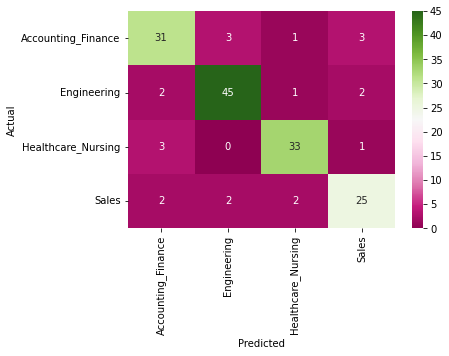

In [23]:
categories = ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales'] # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories, cmap="PiYG") # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

Let's explore some mis-classified examples.

In [24]:
import random

y_pred_prob = model.predict_proba(X_test) # instead of getting the direct prediction, i.e., a label, we can also get the probability distributions of labels

for p_ind in range(0, 2):
    for a_ind in range(0, 2):
        if p_ind !=  a_ind: # when it mis-classifies
            print("'{}' predicted as '{}' : {} examples.".format(categories[a_ind], categories[p_ind],\
                                                                 conf_mat[a_ind, p_ind]))
            print("====================================================")

            # retrieve the indices for the mis-classification
            mis_inds = [test_indices[i] for i in range(0,len(y_test)) if \
                        y_pred[i] == p_ind and y_test[i] == a_ind]
            #print out the article ID and the tokenised text content of the mis-classified examples
            for ind in random.sample(mis_inds,2): # explore 2 examples
                print("------------------------------------------------")
                print(joined_description[ind])
                print("-----------------------------------------------\n")
            print()

'Engineering' predicted as 'Accounting_Finance' : 2 examples.
------------------------------------------------
production coordinator sandbach salary pound ndash client rsquo experts supplying tailored refrigeration control solutions niche markets supermarkets industrial refrigeration plants client established company years contracting past years set expand nbsp nbsp due restructuring client production coordinator join small friendly team based sandbach nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp production coordinator ndash role requirements successful candidate manage administrative tasks relating production activities meet company targets order input company crm system nbsp include regular telesales contact build strong working relationships clients suppliers raising purchase orders suppliers prioritising work load answering client queries email telephone internal external research information awareness stock control procedures assist stock audits perform clerical duties 

### 5-Fold Cross Validation

In [25]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=3879312, shuffle=True)


In [26]:
def evaluate(X_train,X_test,y_train, y_test,seed):
    model = LogisticRegression(random_state=seed,max_iter = 1000)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

num_models = 3
cv_df = pd.DataFrame(columns = ['binary','count','tfidf'],index=range(num_folds)) # creates a dataframe to store the accuracy scores in all the folds

fold = 0
for train_index, test_index in kf.split(list(range(0,len(category)))):
    y_train = [str(category[i]) for i in train_index]
    y_test = [str(category[i]) for i in test_index]

    X_train_binary, X_test_binary = binary_features[train_index], binary_features[test_index]
    cv_df.loc[fold,'binary'] = evaluate(binary_features[train_index],binary_features[test_index],y_train,y_test,seed)

    X_train_count, X_test_count = count_features[train_index], count_features[test_index]
    cv_df.loc[fold,'count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed)

    X_train_tfidf, X_test_tfidf = tfidf_features[train_index], tfidf_features[test_index]
    cv_df.loc[fold,'tfidf'] = evaluate(tfidf_features[train_index],tfidf_features[test_index],y_train,y_test,seed)

    fold +=1

Printing the result of each fold for each vector representation:

In [28]:
cv_df

,binary,count,tfidf
0,0.833333,0.858974,0.858974
1,0.896774,0.890323,0.903226
2,0.890323,0.890323,0.890323
3,0.890323,0.896774,0.916129
4,0.870968,0.883871,0.929032


In [29]:
cv_df.mean()

binary    0.876344
count     0.884053
tfidf     0.899537
dtype: float64

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 3. Job Advertisement Classification</strong></h3>

In [30]:
def gen_docVecs(wv,tk_txts): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # if we haven't pre-processed the articles, it's a good idea to remove stop words

    for i in range(0,len(tk_txts)):
        tokens = tk_txts[i]
        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp = pd.concat([temp, pd.Series(word_vec)], ignore_index = True)
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column
        docs_vectors = pd.concat([docs_vectors, doc_vector], ignore_index = True)
    return docs_vectors

...... Sections and code blocks on buidling classification models based on different document feature represetations. 
Detailed comparsions and evaluations on different models to answer each question as per specification. 

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

## 3. FastText model trained on BBC News data 

trained our `Word2Vec` and `FastText` models using our BBC News dataset

## 3. FastText

As mentioned before, `word2vec` model does not accommodate words that do not appear in the training corpus. 

Here, we’ll learn to work with the fastText library for training word-embedding models, and performing similarity operations & vector lookups analogous to Word2Vec. 

In the following block of code, we import the `FastText` model form Gensim library, then:
1. We set the path to the corpus file. Similar as above, we use the Bbc News article as the training corpus;
2. Initialise the `FastText` model, similar as before, we use 100 dimention vectors;
3. Then we build the vocabulary from the copurs;
4. Finally, we train the fasttext model based on the corpus.

Finally, we experiment the FastText embeddings. 
Similar, we:
* load the FastText model saved in our prevoius activity;
* generate document embeddings based on the load FastText word embeddings;
* explore the reprensentiveness of the features through tSNE;
* bulid the logistic regression model based on the generated document embeddings for news classfication.

T. Mikolov, E. Grave, P. Bojanowski, C. Puhrsch, A. Joulin. Advances in Pre-Training Distributed Word Representations


There are multiple pre-trained models in Gensim, see Section **Pretrained models** in https://radimrehurek.com/gensim/models/word2vec.html.

In [31]:
# from gensim.models.fasttext import FastText

# # 1. Set the corpus file names/path
# corpus_file = './bbcNews.txt'

# # 2. Initialise the Fast Text model
# bbcFT = FastText(vector_size=100) 

# # 3. build the vocabulary
# bbcFT.build_vocab(corpus_file=corpus_file)

# # 4. train the model
# bbcFT.train(
#     corpus_file=corpus_file, epochs=bbcFT.epochs,
#     total_examples=bbcFT.corpus_count, total_words=bbcFT.corpus_total_words,
# )

# print(bbcFT)

In [32]:
# # We can retrieve the KeyedVectors from the model as follows,

# bbcFT_wv = bbcFT.wv
# print(bbcFT_wv)

In [33]:
# # Save the model
# bbcFT.save("bbcFT.model")

In [34]:
# loading the trained Fasttext model based on bbc News data
from gensim.models.fasttext import FastText
bbcFT = FastText.load("bbcFT.model")
print(bbcFT)
bbcFT_wv= bbcFT.wv

FastText(vocab=10485, vector_size=100, alpha=0.025)


In [35]:
job_ad.columns

Index(['Title', 'Webindex', 'Company', 'Description', 'Tokenized Description',
       'Category'],
      dtype='object')

In [36]:
# NOTE this can take some time to finish running
# generate document embeddings
bbcFT_dvs = gen_docVecs(bbcFT_wv,job_ad['Tokenized Description'])
bbcFT_dvs.isna().any().sum()

0

In [37]:
bbcFT_dvs

,0
0,-364.202789
1,-315.708313
2,-659.416565
3,-273.903931
4,-745.514404
...,...
771,-389.416229
772,-1478.176758
773,-2095.067627
774,-724.506653


### ----------> OBSERVATION

0 null record

### 1.1 Understand your task by tSNE

Alright! so we have the document embedding vector representation for each article now, we can proceed to the task of document classification. 
Before, we move on, a good habbit is to explore and understand how difficult the task is, whether there are too much noise in the data, making it impossible to clearly separate each category. 

One way to confirm that the feature space we are using is representative enough for our task (classifying articles into separate labels) to be solvable is to use dimensionality-reduction techniques: These methods project a high-dimensional vector into a lower number of dimensions, with different guarantees on this projection according to the method used. 
In this activity, we will use [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), a popular dimensionality reduction technique used in many fields, including NLP.

Since we will do the same thing again and again when we try other embeddings, we will construct a function to do this again.
The following function `plotTSNE` takes the following arugments:
* labels, the lable/category of each article
* features, a numpy array of document embeddings, each for an article.

and projects the feature/document embedding vectors in a 2 dimension space and plot them out. 
It does the following:
1. get the set of classes, called `categories` (5 categories)
2. sample 30% of the data/document embeddings randomly, and record the indices selected
3. project the selected document embeddings in 2 dimensional space using tSNE, each document embedding now corresponds to a 2 dimensional vector in `projected_features`
4. plot them out as scatter plot and highlight different categories in different color

/Users/s3879312/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/s3879312/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


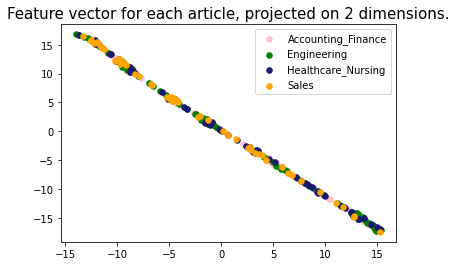

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
    categories = sorted(labels.unique())
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(len(features) * 0.3)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each article, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()
    
# explore feature space
features = bbcFT_dvs.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(job_ad['Category'],features) # plot the tSNE to have a look

In [42]:
# build the classfication model and report results
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(bbcFT_dvs, job_ad['Category'], list(range(0,len(job_ad))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.31906614785992216

In [40]:
import os

# The .py format of the jupyter notebook
for fname in os.listdir():
    if fname.endswith('ipynb'):
        os.system(f'jupyter nbconvert {fname} --to python')

[NbConvertApp] Converting notebook task1.ipynb to python
[NbConvertApp] Writing 29456 bytes to task1.py
[NbConvertApp] Converting notebook task2_3.ipynb to python
[NbConvertApp] Writing 24616 bytes to task2_3.py
[NbConvertApp] Converting notebook model.ipynb to python
[NbConvertApp] Writing 32834 bytes to model.py


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h3>
Give a short summary and anything you would like to talk about the assessment tasks here.

## Couple of notes for all code blocks in this notebook
- please provide proper comment on your code
- Please re-start and run all cells to make sure codes are runable and include your output in the submission.   
<span style="color: red"> This markdown block can be removed once the task is completed. </span>

# Reference

+ https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
+ https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63